In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import joblib
import pairmodule as pair

In [3]:
pt = pd.read_csv('./oclabel/OV_clinicalMatrix', sep = "\t", header = 0)
pt['sampleID'] = pt['sampleID'].replace(regex=['-'], value='.')
pt = pt.set_index('sampleID')
pt

,_INTEGRATION,_PANCAN_CNA_PANCAN_K8,_PANCAN_Cluster_Cluster_PANCAN,_PANCAN_DNAMethyl_PANCAN,_PANCAN_RPPA_PANCAN_K8,_PANCAN_UNC_RNAseq_PANCAN_K16,_PANCAN_miRNA_PANCAN,_PANCAN_mirna_OV,_PANCAN_mutation_PANCAN,_PATIENT,...,_GENOMIC_ID_TCGA_OV_exp_HiSeqV2_PANCAN,_GENOMIC_ID_TCGA_OV_exp_HiSeq_exon,_GENOMIC_ID_TCGA_OV_exp_HiSeqV2,_GENOMIC_ID_TCGA_OV_mutation_broad_gene,_GENOMIC_ID_TCGA_OV_PDMarrayCNV,_GENOMIC_ID_TCGA_OV_PDMRNAseqCNV,_GENOMIC_ID_TCGA_OV_exp_HiSeqV2_exon,_GENOMIC_ID_TCGA_OV_mutation,_GENOMIC_ID_TCGA_OV_G4502A_07_3,_GENOMIC_ID_TCGA_OV_G4502A_07_2
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA.01.0628.11,TCGA-01-0628-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0628-11A-01R-0363-07,NaN
TCGA.01.0629.11,TCGA-01-0629-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0629,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0629-11A-01R-0363-07,NaN
TCGA.01.0630.11,TCGA-01-0630-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0630-11A-01R-0363-07
TCGA.01.0631.11,TCGA-01-0631-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0631,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0631-11A-01R-0363-07
TCGA.01.0633.11,TCGA-01-0633-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0633,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0633-11A-01R-0363-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.72.4241.01,TCGA-72-4241-01,NaN,NaN,OV-like c1,NaN,NaN,NaN,NaN,NaN,TCGA-72-4241,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA.OY.A56P.01,TCGA-OY-A56P-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-OY-A56P,...,05689fed-96dd-4c52-b51d-5dc799422b9a,TCGA-OY-A56P-01A-12R-A406-31,05689fed-96dd-4c52-b51d-5dc799422b9a,NaN,NaN,TCGA-OY-A56P-01,05689fed-96dd-4c52-b51d-5dc799422b9a,NaN,NaN,NaN
TCGA.OY.A56Q.01,TCGA-OY-A56Q-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-OY-A56Q,...,3a1867ff-7c1e-47c1-854f-90c0af4b2d03,TCGA-OY-A56Q-01A-11R-A406-31,3a1867ff-7c1e-47c1-854f-90c0af4b2d03,NaN,NaN,TCGA-OY-A56Q-01,3a1867ff-7c1e-47c1-854f-90c0af4b2d03,NaN,NaN,NaN


In [4]:
df1 = pd.read_csv('./ocRMA/exp.mRNA.AgilentG4502A_07_2.txt',sep = "\t", index_col=0,header = 0)
df2 = pd.read_csv('./ocRMA/exp.mRNA.HT_HG-U133A.txt',sep = "\t", index_col=0,header = 0)
df_idx1 = df1.columns.values
df_idx2 = df2.columns.values

pt1 = pt.loc[df_idx1]
pt1.to_csv('OV_clinicalMatrix_450.csv')
pt2 = pt.loc[df_idx2]
pt2.to_csv('OV_clinicalMatrix_U133A.csv')

In [5]:
df1 = df1[df_idx1]
df2 = df2[df_idx2]
df1

,TCGA.13.0795.01,TCGA.01.0630.11,TCGA.13.0757.01,TCGA.13.0768.01,TCGA.13.0714.01,TCGA.13.0764.01,TCGA.13.0793.01,TCGA.01.0633.11,TCGA.01.0631.11,TCGA.13.0791.01,...,TCGA.13.0726.01,TCGA.09.0367.01,TCGA.09.0364.01,TCGA.13.0762.01,TCGA.13.0794.01,TCGA.13.0727.01,TCGA.13.0760.01,TCGA.13.0725.01,TCGA.01.0637.11,TCGA.13.0801.01
RNF14,-0.1956,-0.3403,0.1592,0.5378,0.3153,-0.6981,-0.2819,0.4745,0.3935,-0.2833,...,1.2172,0.4950,-0.0676,-0.5086,0.5280,-0.2955,-0.0929,0.2427,0.2025,-0.0391
DUOXA1,1.5370,1.3615,0.8665,0.7870,0.6545,1.4995,2.2375,0.8120,0.8160,1.8550,...,0.7600,0.5570,0.2550,1.1200,0.3855,1.0400,0.4645,0.3655,0.6210,0.8295
UBE2Q2,-1.7329,-1.8251,-0.2700,-0.4952,-0.4658,0.8971,-1.4368,0.3862,0.2686,-0.3684,...,-0.7479,-0.5853,-0.2405,-0.6219,-0.2499,-1.0697,-2.3927,0.5835,-0.1727,0.4024
RNF10,0.3964,0.0372,-0.1493,0.2692,0.4868,0.1288,0.7606,-0.1567,-0.2088,0.2227,...,-0.2292,-0.4423,0.2044,-0.3930,-0.3149,0.4602,0.4621,-0.4207,0.3705,-0.6937
RNF11,-0.2052,0.2864,0.3350,0.2482,-0.2680,0.3718,-0.5004,0.5856,0.5946,0.8578,...,0.5234,0.5356,-0.5018,-0.9150,-0.3830,-0.4922,0.4654,0.3002,0.2230,-0.0166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PTRF,-0.1557,0.9548,0.3780,0.6601,-0.0505,-1.7958,0.5002,1.0849,-0.3528,-1.4102,...,-0.0618,-1.4349,-1.8501,-0.8816,-2.4598,-0.2011,-0.8730,-0.8875,-0.0801,-2.0598
SERPINH1,-0.6896,-0.8922,-0.1260,0.2864,-0.0331,-0.4179,0.5769,-0.9629,-0.9129,-0.5851,...,-0.3380,-0.5426,-0.1199,-0.6954,-0.1776,-0.3785,0.4696,-0.0942,-0.9580,-0.6212
NFIX,0.2640,0.8605,0.3778,0.0402,0.3588,-0.1116,0.1574,0.8004,0.2311,-0.1905,...,1.2335,0.3068,-1.2214,0.2307,-1.2338,1.0571,-0.1814,0.0672,0.7269,-0.4342
SELP,0.9706,3.1691,1.0829,3.0878,1.1621,0.6906,1.2559,4.8187,3.6894,0.8595,...,0.2749,0.9496,0.3658,0.0081,0.4771,0.9854,0.2930,2.6325,3.8454,1.1747


In [6]:
clf = joblib.load('lassomodel18.joblib') 

In [7]:
RNA = pd.read_csv('RNAlst.csv',index_col=0)
RNA

,clRNA,mRNA1,mRNA2,type,value_x,value_y,a,b,c,d,fdr
2,BACE1-AS,SLC1A1,VNN1,lnc,0.7982,0.5651,4,15,227,142,1.545709e-03
5,BACE1-AS,SLC1A1,TYRO3,lnc,0.7982,0.5802,4,15,176,114,2.884373e-03
8,BACE1-AS,SLPI,RORA,lnc,0.6643,0.8061,18,8,644,1,1.439688e-10
9,BACE1-AS,SLPI,SMAD5,lnc,0.6643,0.6044,20,6,642,2,2.304854e-07
11,BACE1-AS,STXBP2,VNN1,lnc,0.8502,0.5651,15,10,544,49,9.528536e-05
...,...,...,...,...,...,...,...,...,...,...,...
111954,ZNF93,TRAF1,USP20,circ,0.6968,0.6468,8,18,8,457,8.006675e-07
111955,ZNF93,TRAF1,WFS1,circ,0.6968,0.7698,8,18,8,635,8.919743e-08
111962,ZNF93,TYRO3,WFS1,circ,0.5020,0.7698,6,18,4,625,9.927468e-07
111964,ZNF93,USP20,WFS1,circ,0.6468,0.7698,9,13,10,557,1.115469e-08


In [8]:
def score(df):
    return clf.predict(pair.dftopair(df,RNA['mRNA1'],RNA['mRNA2'], 0.5))

In [9]:
df_scr1 = pt1.copy()
df_scr1['riskscore'] = score(df1)

df_scr2 = pt2.copy()
df_scr2['riskscore'] = score(df2)
df_scr1

,_INTEGRATION,_PANCAN_CNA_PANCAN_K8,_PANCAN_Cluster_Cluster_PANCAN,_PANCAN_DNAMethyl_PANCAN,_PANCAN_RPPA_PANCAN_K8,_PANCAN_UNC_RNAseq_PANCAN_K16,_PANCAN_miRNA_PANCAN,_PANCAN_mirna_OV,_PANCAN_mutation_PANCAN,_PATIENT,...,_GENOMIC_ID_TCGA_OV_exp_HiSeq_exon,_GENOMIC_ID_TCGA_OV_exp_HiSeqV2,_GENOMIC_ID_TCGA_OV_mutation_broad_gene,_GENOMIC_ID_TCGA_OV_PDMarrayCNV,_GENOMIC_ID_TCGA_OV_PDMRNAseqCNV,_GENOMIC_ID_TCGA_OV_exp_HiSeqV2_exon,_GENOMIC_ID_TCGA_OV_mutation,_GENOMIC_ID_TCGA_OV_G4502A_07_3,_GENOMIC_ID_TCGA_OV_G4502A_07_2,riskscore
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA.13.0795.01,TCGA-13-0795-01,High,NaN,OV-like c1,NaN,NaN,miRNA cluster 1,cluster 5,mutation cluster 5,TCGA-13-0795,...,NaN,NaN,NaN,TCGA-13-0795-01,NaN,NaN,TCGA-13-0795-01A-01W-0372-09,NaN,TCGA-13-0795-01A-01R-0363-07,0.534284
TCGA.01.0630.11,TCGA-01-0630-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0630-11A-01R-0363-07,0.038757
TCGA.13.0757.01,TCGA-13-0757-01,High,NaN,OV-like c1,NaN,NaN,miRNA cluster 2,cluster 1,NaN,TCGA-13-0757,...,NaN,NaN,NaN,TCGA-13-0757-01,NaN,NaN,NaN,NaN,TCGA-13-0757-01A-01R-0363-07,0.407336
TCGA.13.0768.01,TCGA-13-0768-01,High,NaN,OV-like c1,NaN,NaN,miRNA cluster 3,cluster 5,NaN,TCGA-13-0768,...,NaN,NaN,NaN,TCGA-13-0768-01,NaN,NaN,NaN,NaN,TCGA-13-0768-01A-01R-0363-07,0.046579
TCGA.13.0714.01,TCGA-13-0714-01,High,NaN,OV-like c1,NaN,NaN,miRNA cluster 2,cluster 1,mutation cluster 5,TCGA-13-0714,...,NaN,NaN,NaN,TCGA-13-0714-01,NaN,NaN,TCGA-13-0714-01A-01W-0370-10,NaN,TCGA-13-0714-01A-01R-0363-07,0.083828
TCGA.13.0764.01,TCGA-13-0764-01,High,NaN,OV-like c1,NaN,NaN,NaN,NaN,NaN,TCGA-13-0764,...,NaN,NaN,NaN,TCGA-13-0764-01,NaN,NaN,NaN,NaN,TCGA-13-0764-01A-03R-0363-07,0.628725
TCGA.13.0793.01,TCGA-13-0793-01,Squamous,C9-OV,OV-like c1,OV-like c4,NaN,miRNA cluster 2,cluster 1,mutation cluster 5,TCGA-13-0793,...,NaN,NaN,NaN,TCGA-13-0793-01,NaN,NaN,TCGA-13-0793-01A-01W-0370-10,NaN,TCGA-13-0793-01A-01R-0363-07,0.563734
TCGA.01.0633.11,TCGA-01-0633-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0633,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0633-11A-01R-0363-07,0.038757
TCGA.01.0631.11,TCGA-01-0631-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0631,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-01-0631-11A-01R-0363-07,0.038757


<AxesSubplot:xlabel='clinical_stage', ylabel='riskscore'>

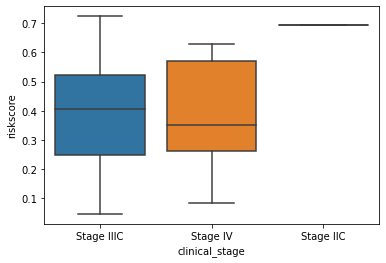

In [10]:
sns.boxplot(x = df_scr1['clinical_stage'], y = df_scr1['riskscore'])

In [11]:
f, p = stats.f_oneway(df_scr1[df_scr1['clinical_stage'] == 'Stage IIIC']['riskscore'].values,
                      df_scr1[df_scr1['clinical_stage'] == 'Stage IV']['riskscore'].values,
                      df_scr1[df_scr1['clinical_stage'] == 'Stage IIC']['riskscore'].values)
p

0.35028189707277513

In [12]:
stats.ttest_ind(df_scr1[df_scr1['clinical_stage'] == ('Stage IIIC'or'Stage IIC')]['riskscore'].values,
                df_scr1[df_scr1['clinical_stage'] == 'Stage IV']['riskscore'].values)

Ttest_indResult(statistic=0.05754732417125495, pvalue=0.9545179337958911)

(0.75, 1.0)

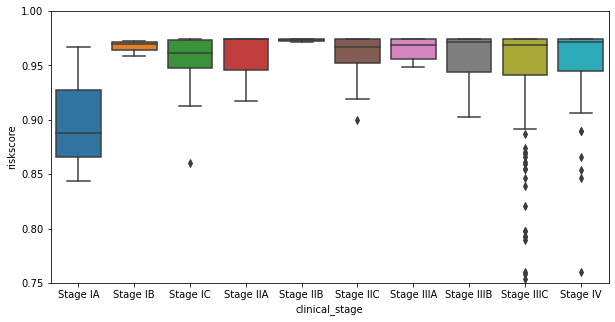

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(x = df_scr2['clinical_stage'], y = df_scr2['riskscore'],
            order = ['Stage IA', 'Stage IB','Stage IC','Stage IIA','Stage IIB','Stage IIC','Stage IIIA','Stage IIIB','Stage IIIC','Stage IV'])
plt.ylim(0.75,1.0)

In [14]:
df_scr3 = df_scr2.copy(deep=True)
df_scr3.dropna(axis=0,subset=['clinical_stage'],how='any',inplace = True)


In [15]:
stg1 = ['Stage IA', 'Stage IB','Stage IC','Stage IIA','Stage IIB','Stage IIC','Stage IIIA','Stage IIIB','Stage IIIC','Stage IV']
stg2 = ['Stage IA', 'Others','Others','Others','Others','Others','Others','Others','Others','Others']

for i,j in zip(stg1,stg2):
    mask = df_scr3['clinical_stage'] == i
    df_scr3.loc[mask, 'clinical_stage'] = j

In [16]:
df_scr3[['riskscore','clinical_stage']]

,riskscore,clinical_stage
sampleID,,
TCGA.61.1910.01,0.966708,Others
TCGA.61.1728.01,0.974531,Others
TCGA.13.1819.02,0.974531,Others
TCGA.31.1953.01,0.971120,Others
TCGA.13.1819.01,0.974531,Others
...,...,...
TCGA.24.1545.01,0.939457,Others
TCGA.61.1907.01,0.974531,Others
TCGA.04.1638.01,0.974531,Others


0.33401028748014006


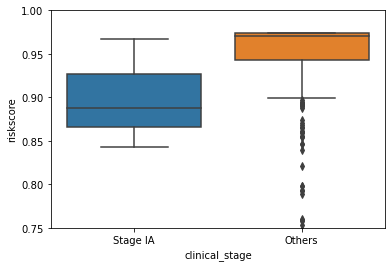

In [20]:
sns.boxplot(x = df_scr3['clinical_stage'], y = df_scr3['riskscore'],
            order = ['Stage IA','Others'])
plt.ylim(0.75,1)
stat, pvalue = stats.ttest_ind(df_scr3[df_scr3['clinical_stage'] == 'Stage IA']['riskscore'], 
                               df_scr3[df_scr3['clinical_stage'] == 'Others']['riskscore'])
print(pvalue)

In [18]:
df_scr2.to_csv('riskscore&10clinical_stage')
df_scr3.to_csv('riskscore&4clinical_stage')